#PyTorch Computer Vision.

* See reference Notebook:
*See refrence online:

##0. Computer vision Libraries in PyTorch
* `torch.vision`:https://pytorch.org/vision/stable/index.html
* `torchvision.datasets` - get datasets and data loading functions for
  computer vision here
* `torchvision.models`- get pretrained computer vision models that you can leverage for your own problems.
`torch.transforms` - functions for manipulating your vision data (images) to be suitble for use by a ML model.
* `torch.util.data.Dataset` - Base data class for PyTorch.
* `torch.utils.data.Dataloader`- Create a Python iterable over a dataset.

In [2]:
#import PyTorch
import torch
from torch import nn

#Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

#Import matplotlib for visualization
import matplotlib.pyplot as plt

#Check Version
print(torch.__version__)
print(torchvision.__version__)

2.3.1+cu121
0.18.1+cu121


##1. Getting a Dataset
The dataset used is fashionMNIST from torchvision.datasets - https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST

In [3]:
#Setup Training Data
train_data = datasets.FashionMNIST(root="data", #Where to download data to
                                   train=True, #Do we want the training data.
                                   download=True, # do we want to download yes/No
                                   transform=torchvision.transforms.ToTensor(),
                                   target_transform=None #How do we want to transform the labels/targets
                                   )

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:10<00:00, 2498866.75it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 308615.37it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:04<00:00, 975256.47it/s] 


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 11608751.07it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
len(train_data),len(test_data)

(60000, 10000)

In [5]:
#See the first training sample
image,label = train_data[0]
image,label


(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
#Check the shape of our image
print(f"Image Shape: {image.shape} -> [color_channels,height,width]")
print(f"Image Label: {class_names[label]} ->")

Image Shape: torch.Size([1, 28, 28]) -> [color_channels,height,width]
Image Label: Ankle boot ->


###1.2.Visualize our data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

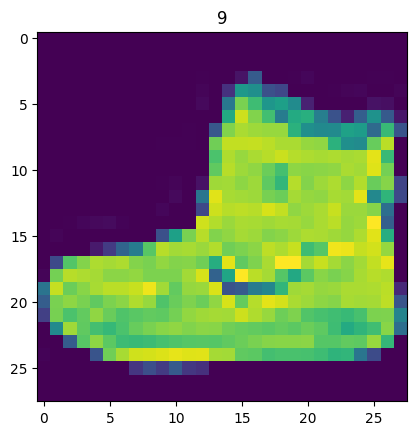

In [9]:
import matplotlib.pyplot as plt
image,label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

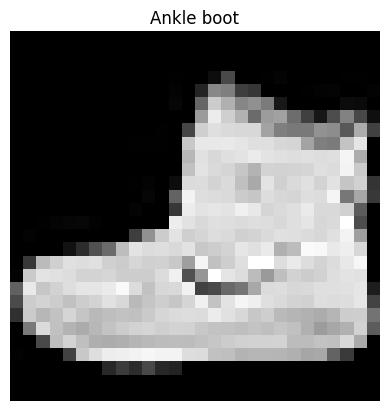

In [10]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label]);
plt.axis(False)

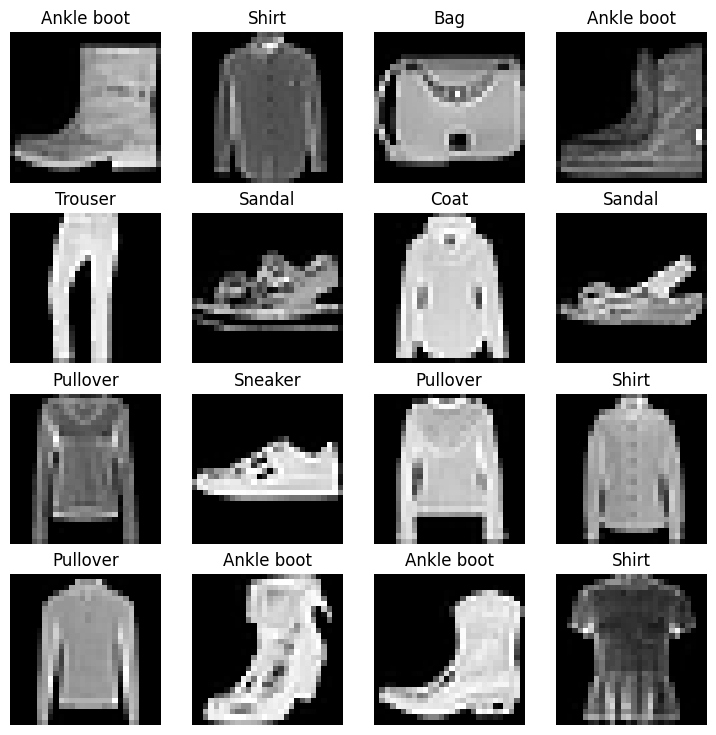

In [11]:
#Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows,cols = 4,4
for i in range(1,rows*cols+1):
  random_idx = torch.randint(0,len(train_data),size=[1]).item()

  image,label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(image.squeeze(),cmap="gray")
  plt.title(class_names[label]);
  plt.axis(False)

Do you think these items of clothing (images) could be modelled with pure linear lines or we'll need non-linearity

from collections.abc import Iterable
##2. Prepare DataLoader.
Right now our data is in the form PyTorch Datasets.
DataLoader turns our dataset into a Python Iterable
More specifically, we want to turn our data into batches.

Why would we do this?
1. More computationally efficient, as in , your computing hardware may not be able to look(store in memory) at 6000 images in one hit. So we break it down to 32 images at a time.
2. It gives our neural networkk more chances to update its gradients per epoch.

In [12]:
from torch.utils.data import DataLoader
#Setup batch size hyperparameter
BATCH_SIZE = 32

#Turn the data into iterables
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7dc11684b9a0>,
 <torch.utils.data.dataloader.DataLoader at 0x7dc11684bfa0>)

In [13]:
#Let's check out what we've created
print(f"dataLoaders: {train_dataloader,test_dataloader}")
print(f"Length of the train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

dataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7dc11684b9a0>, <torch.utils.data.dataloader.DataLoader object at 0x7dc11684bfa0>)
Length of the train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches of 32


In [14]:
#Check out what's inside the training dataloader.
train_features_batch,train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image Size: torch.Size([1, 28, 28])
Label: 6, Label _Size: torch.Size([])


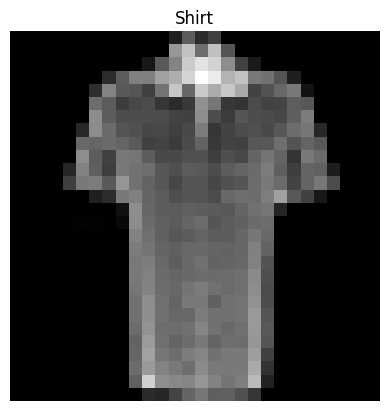

In [15]:
#Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
image,label = train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image Size: {image.shape}")
print(f"Label: {label}, Label _Size: {label.shape}")

##3. Model_0: Build a Baseline Model

When starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model

A baseline model is a simple model you will try and improve upon with subsequent models/experiements.

In other words, start simply and add complexity when necessary

In [16]:
#Create a flatten layer.
flatten_model = nn.Flatten()

#Get a single sample
x = train_features_batch[0]

#Flatten the sample.
output = flatten_model(x) #Perform a forward pass.

#Print out whtat's happenin'
print(f"Shape before flattenin': {x.shape}")
print(f"Shape after flattenin' : {output.shape}")


Shape before flattenin': torch.Size([1, 28, 28])
Shape after flattenin' : torch.Size([1, 784])


In [17]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)

In [18]:
torch.manual_seed(42)

#Setup model with input parameters.
model_0 = FashionMNISTModelV0(
    input_shape=784,# 28*28
    hidden_units=10, #How many units in the hidden layer.
    output_shape = len(class_names) #One for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [19]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x).shape

torch.Size([1, 10])

###3.1. Setup loss,optimizer and Evaluation metrics.
* Loss function -> since we are working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`.
* Optimizer -> our optimizer torch.optim.SGD() (stochastic gradiient descent)

* Evaluation metric - since we're working on a classification problem, let's use aaccuracy as our evaluation metric.

In [20]:
import requests
from pathlib import Path

#Download helper functions from Learn PyTorch repo.
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping downlaod...")

else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open('helper_functions.py','wb') as f:
    f.write(request.content)

In [21]:
#Import accuracy metric
from helper_functions import accuracy_fn

In [22]:
#Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)
accuracy_fn

<function helper_functions.accuracy_fn(y_true, y_pred)>

###3.2. Creating a function to time our experiments.

Machine learning is very experimental.

Two of the main things you i'll want to track are:
1. Model's performance (loss and accuracy etc)
2. How fast it runs.

In [23]:
from timeit import default_timer as timer
def print_train_time(start:float,
                     end:float,
                     device:torch.device=None):
  """Printts difference between start and stop."""
  total_time = end - start
  print(f"Train time: {device}: {total_time:.3f} seconds")
  return total_time

In [24]:
start_time = timer()

#Some code.
end_time = timer()
print_train_time(start=start_time,end=end_time,device="cpu")

Train time: cpu: 0.000 seconds


6.158799999411713e-05

###3.3. Creating a training loop and training a model on batches of data.

1. Loop through epochs.

2. Loop through training batches,perform training steps,calculate the training loss *per batch*

3. Loop through testing batches,perform testing steps,calculate the test loss *per batch*
4. print out what's happenin'
5. Time it all for fun.

In [25]:
#Import tqdm
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  ### Training
  train_loss = 0
  # Add a loop to loop through the training batches
  for batch, (x, y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(x)

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step (update the model's parameters once *per batch*)
    optimizer.step()

    # Print out what's happening
    if batch % 400 == 0:
        print(f"Looked at {batch * len(x)}/{len(train_dataloader.dataset)} samples.")

  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for x_test, y_test in test_dataloader:
      # 1. Forward pass
      test_pred = model_0(x_test)

      # 2. Calculate loss (accumulatively)
      test_loss += loss_fn(test_pred, y_test)

      # 3. Calculate accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate the test acc average per batch
    test_acc /= len(test_dataloader)

  # Print out what's happening
  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))




  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.5904 | Test loss: 0.5095, Test acc: 82.0387
Epoch: 1
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4763 | Test loss: 0.4799, Test acc: 83.1969
Epoch: 2
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4550 | Test loss: 0.4766, Test acc: 83.4265
Train time: cpu: 38.433 seconds


In [26]:
next(model_0.parameters()).device

device(type='cpu')

##4. Make Predictions and get Model_0 results.

In [27]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for x, y in tqdm(data_loader):
      # Make predictions
      y_pred = model(x)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [28]:
##5. Setup device Agnostic code.
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [29]:
torch.cuda.is_available()

False

In [30]:
#Setup device Agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

##6. Model_1: Building a better model with non-linearity.

In [31]:
#create a model with linear and non-linear layers.
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), #Flatten inputs into single vector
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_shape),
        nn.ReLU()
            )

  def forward(self,x: torch.Tensor):
    return self.layer_stack(x)

In [32]:
#Create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, #This is the output of the flattened after 28*28 image goes in
                              hidden_units=10,
                              output_shape=len(class_names)).to(device) #Send to GPU if it's available

next(model_1.parameters()).device


device(type='cpu')

In [33]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


##6.1. Setup loss,optimizer and evaluation metrics.


In [34]:
from helper_functions import accuracy_fn #Measures how wrong our model is.
loss_fn=  nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), #Tries to update the model's parameters to reduce the loss.
                            lr=0.1)


###6.2. Functionizing training and evaluation/testing loops.

Let's create a function for:
* Training loop -> `train_step()`
* Testing loop -> `test_step()`

In [35]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """Performs a training with model trying to learn on data_loader."""
  train_loss, train_acc = 0, 0

  # Put model into training mode
  model.train()

  # Add a loop to loop through the training batches
  for batch, (x, y) in enumerate(data_loader):
    # Put data on target device
    x, y = x.to(device), y.to(device)

    # 1. Forward pass (outputs the raw logits from the model)
    y_pred = model(x)

    # 2. Calculate loss and accuracy (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1)) # go from logits -> prediction labels

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step (update the model's parameters once *per batch*)
    optimizer.step()

  # Divide total train loss and acc by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [36]:
def test_step(model:torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """Performs a tyesting loop step on model going over data_loader."""
  test_loss,test_acc = 0,0

  #Put the model in eval mode.
  model.eval()

  #Turn on inference mode context manager.
  with torch.inference_mode():
    for x,y in data_loader:

      #Send the data to the target device.
      x,y = x.to(device),y.to(device)

      #1. Forward pass.
      test_pred = model(x)

      #2. Calculate the loss.
      test_loss += loss_fn(test_pred,y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1)) #go from logits -> prediction labels

    #Adjust mettrics and print out what is happenin'
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%\n")

In [37]:
torch.manual_seed(42)

#Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

#Set the epochs
epochs = 3

#Create an optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n")
  train_step(model=model_1,
            data_loader=train_dataloader,
            loss_fn=loss_fn,
            optimizer=optimizer,
            accuracy_fn=accuracy_fn,
            device=device)

  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0

Train loss: 1.09199 | Train acc: 61.34%
Test Loss: 0.95636 | Test Acc: 65.00%

Epoch: 1

Train loss: 0.78101 | Train acc: 71.93%
Test Loss: 0.72227 | Test Acc: 73.91%

Epoch: 2

Train loss: 0.67027 | Train acc: 75.94%
Test Loss: 0.68500 | Test Acc: 75.02%

Train time: cpu: 56.936 seconds


**Note** some times depending on data/hardware you might find that your model trains faster on CPU than GPU.

Why is this?

1. It could be that the overhead for copying data/model to and from the GPU outweighs the compute benefits offered by the GPU.
2. The hardware you are using has a better CPU interms of compute capability than the GPU.

In [38]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  """Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for x, y in tqdm(data_loader):
      #Make our data device agnostic.
      x,y = x.to(device),y.to(device)
      # Make predictions
      y_pred = model(x)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

In [39]:
#Get model_1 results dictionary.
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

##Model_2: Building a Convolutional Neural Network (CNN)

CNN's are also known as ConvNets.


CNNs are known for their capabilities to find patterns in Visual data.

To understand what's happens in a CNN see: https://poloclub.github.io/cnn-explainer/

In [40]:
import torch
from torch import nn
#Create a Convoluted Neural Network.
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replaces the TinyVGG
  model from CNN explainer website.
  """
  def __init__(self,input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size = 3,
                  stride=1,
                  padding=1), #Values we can set ourselves in a neural network are called hyperparameters.
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)


    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units *7 * 7,out_features=output_shape) #There's a trick to solving this.
    )
  def forward(self,x):
    x = self.conv_block_1(x)
    #print(f"Shape of conv block 1: {x.shape}")

    x = self.conv_block_2(x)
    #print(f"Shape of conv block 2: {x.shape}")
    x= self.classifier(x)
    #print(f"Shape of classifier: {x.shape}")
    return x

In [41]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

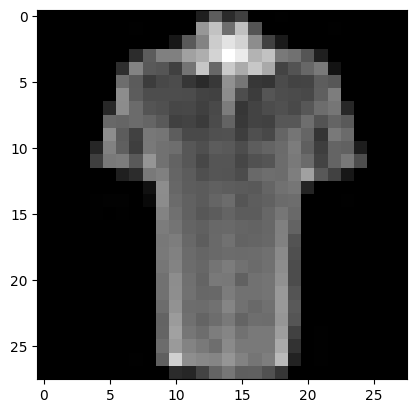

In [42]:
plt.imshow(image.squeeze(), cmap="gray")

In [43]:
rand_image_tensor = torch.randn(size=(1, 28, 28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [44]:
#Pass the image through a model.
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

###7.1. Stepping through `nn.Conv2d()`

See the documentation here: https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [45]:
torch.manual_seed(42)

#Create a batch of images.
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [46]:
#Create a single Conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3),
                       stride=1,
                       padding=1)

#Pass the data through the convolutional layer.
conv_output = conv_layer(test_image)
conv_output

tensor([[[ 1.6446e-01, -6.2518e-01, -7.7713e-01,  ..., -3.2504e-01,
          -3.1604e-01,  4.5352e-01],
         [ 3.5455e-01, -2.8778e-01, -6.0596e-02,  ...,  6.6224e-01,
          -2.3216e-01,  7.7080e-01],
         [-4.5420e-02, -9.8911e-01, -4.0099e-01,  ..., -1.8552e-01,
          -5.7622e-01,  4.2301e-01],
         ...,
         [ 2.9288e-01, -1.4512e-01, -1.1566e-01,  ..., -3.6626e-01,
           3.5645e-01,  2.8384e-01],
         [ 2.0746e-01,  3.6096e-02,  1.5214e-01,  ..., -4.9680e-01,
          -7.2258e-01, -8.3858e-02],
         [-3.2457e-01, -3.2326e-01,  9.5475e-02,  ...,  5.9960e-01,
           3.2819e-01,  3.6604e-01]],

        [[ 1.2406e+00,  2.2794e-01, -1.8362e-01,  ..., -6.3520e-01,
          -7.5413e-01,  4.0612e-01],
         [ 4.1380e-01, -1.0853e+00, -1.6079e+00,  ..., -1.7643e+00,
           2.5263e-01,  3.8844e-01],
         [ 5.3442e-01, -8.2507e-01,  6.3866e-01,  ...,  4.8068e-01,
           8.4869e-01, -1.5706e-01],
         ...,
         [-5.6923e-03, -5

###7.2. Stepping through `nn.MaxPool2d()`

Read documentation here:https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html

In [47]:
test_image.shape

torch.Size([3, 64, 64])

In [48]:
#print out original imageshape without unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

#Create a sample nn.MaxPool2d layer.
max_pool_layer = nn.MaxPool2d(kernel_size=2)

#Pass through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going conv_layer(): {test_image_through_conv.shape}")

#Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv layer and maxpool layer: {test_image_through_conv_and_max_pool.shape}")




Test image original shape: torch.Size([3, 64, 64])
Test with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going conv_layer(): torch.Size([1, 10, 64, 64])
Shape after going through conv layer and maxpool layer: torch.Size([1, 10, 32, 32])


In [49]:
torch.manual_seed(42)

#Create a random tensor with a similar numbe rof dimensions to our images.

random_tensor = torch.randn(size=(1,1,2,2))
print(f"\nRandom tensor: {random_tensor}")
print(f"\nRandom tensor shape: {random_tensor.shape}")
#Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

#Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)

print(f"\nMax pool tensor: {max_pool_tensor}")
print(f"\nMax pool tensor shape: {max_pool_tensor.shape}")
random_tensor


Random tensor: tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor: tensor([[[[0.3367]]]])

Max pool tensor shape: torch.Size([1, 1, 1, 1])


tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

###7.3 setup a loss function and optimizer for model_2.


In [50]:
#Setup loss functiom/eval metrics/optimizer.
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

###7.4. Training and Testing model_2 through our training and test functions.

In [51]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

%%time
#Measure time
from tqdm.auto import tqdm

###Train and test model

#Set the epochs
epochs = 3

#Create an optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n")
  train_step(model=model_2,
            data_loader=train_dataloader,
            loss_fn=loss_fn,
            optimizer=optimizer,
            accuracy_fn=accuracy_fn,
            device=device)

  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0

Train loss: 0.59518 | Train acc: 78.38%
Test Loss: 0.39500 | Test Acc: 85.99%

Epoch: 1

Train loss: 0.36536 | Train acc: 86.90%
Test Loss: 0.35244 | Test Acc: 86.91%

Epoch: 2

Train loss: 0.32588 | Train acc: 88.13%
Test Loss: 0.32719 | Test Acc: 88.07%

Train time: cpu: 204.603 seconds


In [52]:
#Get model_1 results dictionary.
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

## 8.Compare model Results and Training time.

In [53]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                               model_1_results,
                               model_2_results])

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.327190,88.069089


In [54]:
#Add training time to results comparison.
compare_results['training_time'] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,38.432888
1,FashionMNISTModelV1,0.685001,75.019968,56.936324
2,FashionMNISTModelV2,0.327190,88.069089,204.602769


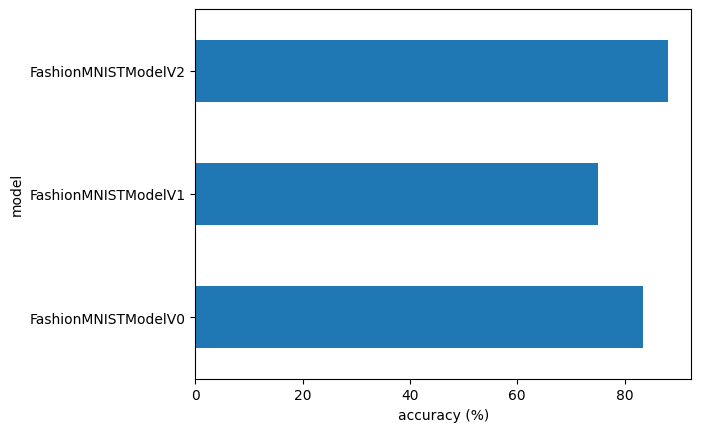

In [55]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");


##9. Make and evaluate random predictions with best model

In [56]:
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device: torch.device = device):

  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      #Prepare the sample.
      sample=torch.unsqueeze(sample,dim=0).to(device)

      #1.Froward pass(model_outputs raw logits).
      pred_logit = model(sample)

      #Get predictions probability (logits -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)

      # Get pred_prob of the GPU for further calculation.
      pred_probs.append(pred_prob.cpu())

  #Stack the pred_probs to turn list into a tensor.
  return torch.stack(pred_probs)


In [57]:
import random
# random.seed(42)

test_samples = []
test_labels = []

for sample,label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

#View the first smaple shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Pullover')

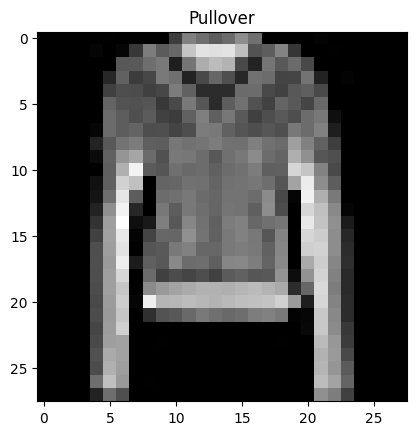

In [58]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]])

In [59]:
#Make Predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View first two prediction probabilities
pred_probs[:2]


tensor([[8.9149e-03, 2.3507e-04, 7.0284e-01, 1.6458e-03, 2.6568e-01, 6.6581e-05,
         2.0305e-02, 8.4465e-06, 2.8423e-04, 1.8886e-05],
        [4.3904e-03, 1.0705e-02, 2.8978e-04, 9.6874e-01, 4.4617e-03, 9.8831e-04,
         2.2794e-03, 5.3995e-04, 5.5339e-03, 2.0730e-03]])

In [60]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes


tensor([2, 3, 7, 2, 5, 6, 8, 5, 0])

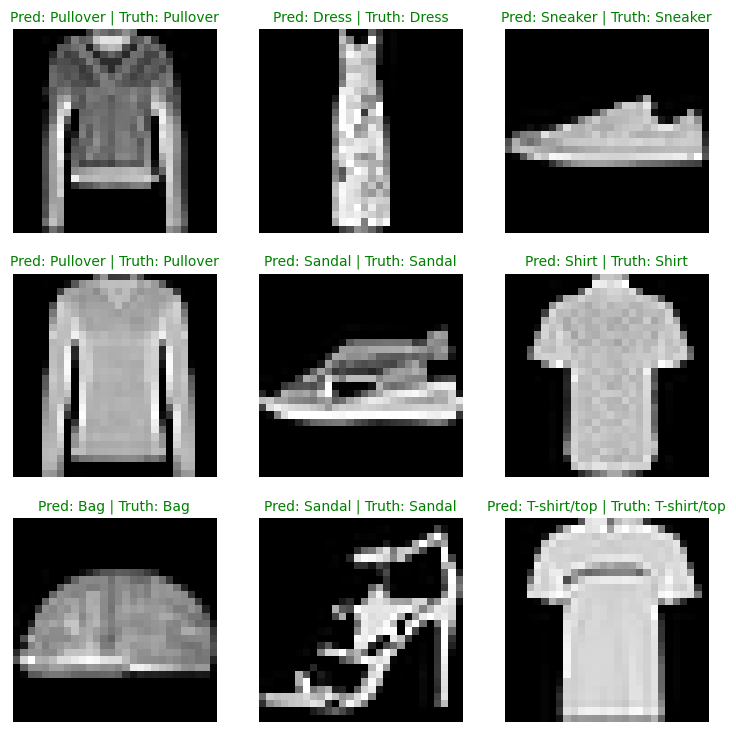

In [61]:
#Plot Predictions.
plt.figure(figsize=(9,9))
nrows= 3
ncols = 3

for i, sample in enumerate(test_samples):
  #Create a subplot
  plt.subplot(nrows,ncols, i+1)

  #Plot the target image.
  plt.imshow(sample.squeeze(),cmap="gray")

  #Find the prediction (in text form)
  pred_label = class_names[pred_classes[i]]

  #Get the true label (in text form)
  true_label = class_names[test_labels[i]]

  #Create a title of the plot
  title_text = f"Pred: {pred_label} | Truth: {true_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == true_label:
    plt.title(title_text, fontsize=10, c="g") # green text if prediction same as true
  else:
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False);

##10. Making a confusion matrix for further prediction evaluation.

A Confusion matrix is a fantastic way of evaluating your classification model visually: https://www.learnpytorch.io/03_pytorch_computer_vision/#10-making-a-confusion-matrix-for-further-prediction-evaluation

1. Make predictions with our trained model on the test dataset.

2. Make a confusion matrix `torchmetrics.confusionMatrix()`

3. Plot the Confusion Matrix using `mlextend.plotting.plot_confusion_matrix()`


In [62]:
# Import tqdm.auto
from tqdm.auto import tqdm


# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for x, y in tqdm(test_dataloader, desc="Making predictions..."):
    # Send the data and targets to target device
    x, y = x.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(x)
    # Turn predictions from logits -> prediction probabilities -> prediction labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    # Put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 8])

In [63]:
import torchmetrics

ModuleNotFoundError: No module named 'torchmetrics'

In [66]:
#See if the required packages are installed and if not, install them...

try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1] >= 19, "mlxtend version should be 0.19.0 or higher")
except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [67]:
import mlxtend
print(mlxtend.__version__)


0.23.1


In [68]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [69]:
y_pred_tensor[:10]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [71]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

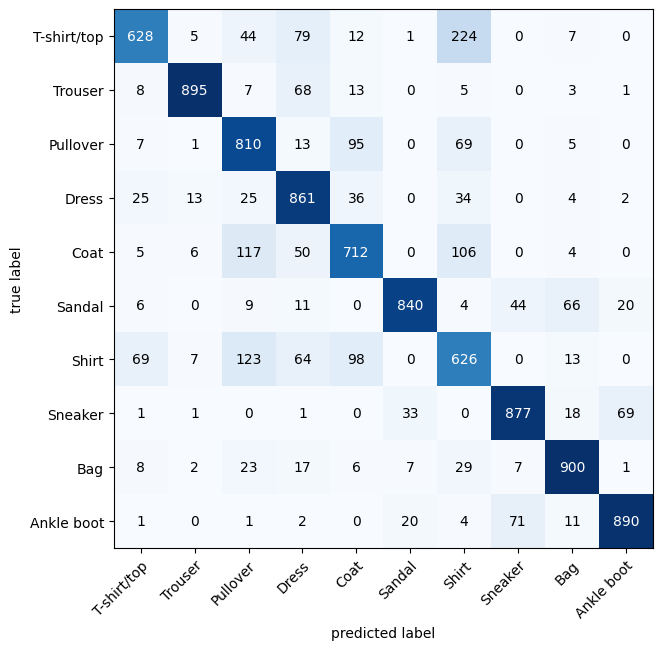

In [73]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names),task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with numpy
    class_names=class_names,
    figsize=(10, 7)
)


##11. Save and load best performing model.

In [77]:
from pathlib import Path

#Create model directory path.
MODEL_PATH= Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

#Create a model save
MODEL_NAME = "03_PyTorch_Computer_Vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

#Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)


Saving model to: models/03_PyTorch_Computer_Vision_model_2.pth


In [78]:
#Create a new instance.
torch.manual_seed(42)
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                    hidden_units=10,
                                     output_shape=len(class_names))

#Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

#Send the model to the target device.
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [79]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [81]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-02)

tensor(True)